# Affine Transformations

In this article, we are going to look at affine transformations of images. To properly understand them, let us look at various image transformations that can be done.

## 2x2 Matrix Transformations

2x2 image transformations are those transformations that can be done using a 2x2 matrix. Examples of these include rotation, skew/shear, scale and flip. Their matrices are as follows:

**Shear**
$$\begin{bmatrix} 1 & Sh_y \\ Sh_x & 1 \end{bmatrix}$$ 

The $Sh_x$ and $Sh_y$ variables represent the shear factor in the **X** and **Y** coordinates respectively.

**Scale**
$$\begin{bmatrix} S_x & 0 \\ 0 & S_y \end{bmatrix}$$

The $S_x$ and $S_y$ variables represent the scale factor in the **X** and **Y** coordinates respectively.

**Rotation**
$$\begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix}$$

$\theta$ defines the angle of rotation.

These types of transformations are known as **linear transformations** and they can be represented by the equation $$Ap$$ where $A$ is the 2x2 transformation matrix and $p$ is the coordinate vector.
<br>

They have the following properties:
* Origin maps to the origin
* Lines map to lines
* Parallel lines remain parallel

## 3x3 Matrix Transformations

There are other image transformations that we cannot do using a 2x2 matrix. An example is translation. A translation shifts the whole image, changing the origin. It's equation can be written as:
$$\begin{bmatrix} x \\ y  \end{bmatrix} + \begin{bmatrix} b_x \\ b_y \end{bmatrix}$$

This means that unlike all the transformations above, this transformation requires an additional vector addition. If coupled with any other 2D transformation, then it would require a multiplication and an addition e.g. a scale and a translation would look like:
$$\begin{bmatrix} S_x & 0 \\ 0 & S_y \end{bmatrix} * \begin{bmatrix} x \\ y  \end{bmatrix} + \begin{bmatrix} b_x \\ b_y \end{bmatrix}$$

### Homogeneous Coordinates

We have seen that in order to do any 2x2 transformation coupled with translation we require one matrix-vector multiplication and one vector-vector addition. It would be nice if we could combine these two operations into one, and we can!
<br><br>
To achieve this, we have to look at the coordinate system that we have been using up until now, the **cartesian coordinate system**, i.e. the coordinate vector $p$ signifies the pixel at location $(x, y)$ in the image. We can represent the coordinates of a pixel in another way, using **homogeneous coordinates**. To obtain a homogeneous coordinate from a cartesian coordinate, we simply add one extra dimension like so:
<br>
$\begin{bmatrix} x \\ y  \end{bmatrix}$ becomes $\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}$. You can visualize this as taking the image plane and placing it in $z$ = 1 plane.

<br>
To obtain the cartesian coordinate from the homogeneous coordinate, we divide the first two coordinates by the last coordinate.
<br>
Hence, 
$\begin{bmatrix} zx \\ zy \\ z \end{bmatrix}$ becomes $\begin{bmatrix} \frac{zx}{z} \\ \frac{zy}{z}  \end{bmatrix}$.

### Scale Invariant
One thing to note is that homogeneous coordinates are scale invariant. That is to say that a homogeneous coordinate and its scaled version correspond to the same cartesian point. i.e:
<br>
$\begin{bmatrix} zx \\ zy \\ z \end{bmatrix}$ is similar to $\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}$ for any $(x, y)$ when converted back to the  cartesian coordinate system. The points are just the same point but in different z-plane.

<br>
Armed with this knowledge, we can rewrite the translation transformation as one 3x3 matrix. Hence, the vector-vector addition $\begin{bmatrix} x \\ y  \end{bmatrix} + \begin{bmatrix} b_x \\ b_y \end{bmatrix}$ becomes:

$$\begin{bmatrix}1 & 0 & b_0\\0 & 1 & b_1\\ 0 & 0 & 1\end{bmatrix} * \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}$$

our new translation matrix. The result of this multiplication is a homogeneous coordinate which we can convert to a cartesian. We can go further than that and represent all 2x2 matrices in this new 3x3 matrix. The example we did earlier of combining a scale and a translation can be represented as one matrix. Hence, $\begin{bmatrix} S_x & 0 \\ 0 & S_y \end{bmatrix} * \begin{bmatrix} x \\ y  \end{bmatrix} + \begin{bmatrix} b_x \\ b_y \end{bmatrix}$ becomes:

$$\begin{bmatrix}S_x & 0 & b_0\\0 & S_y & b_1\\ 0 & 0 & 1\end{bmatrix} * \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}$$

In fact, all 2x2 transformations can be represented in this 3x3 matrix. We can write the matrix that encaspulates both 2x2 transformations and translation. The matrix below:
$$\begin{bmatrix}A_{00} & A_{01} & b_0\\A_{10} & A_{11} & b_1\\ 0 & 0 & 1\end{bmatrix}$$

where the 2x2 $A$ matrix allows us to do any 2x2 transformation and the $b$ vector, any translation. Any transformation done on an image that involves this matrix is called an **affine transformation**. In all cases of the affine transform, the last row remains $\begin{bmatrix}0 & 0 & 1\end{bmatrix}$.

### Properties of Affine Transformations
Affine transforms have properties almost similar to 2x2 matrix transformations. However, they differ in the fact that the origin does not necessarily map to the origin.

## Affine Transform using OpenCV

Let us now illustrate how we can perform affine transforms in OpenCV. OpenCV provides us with a method for perfoming affine transforms, `cv2.warpAffine`. It also provides us a convenience function to get the affine transformation matrix given coordinate points, `cv2.getAffineTransform`. Let us use the two methods to illustrate an affine transform of an image.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['image.cmap'] = 'gray'

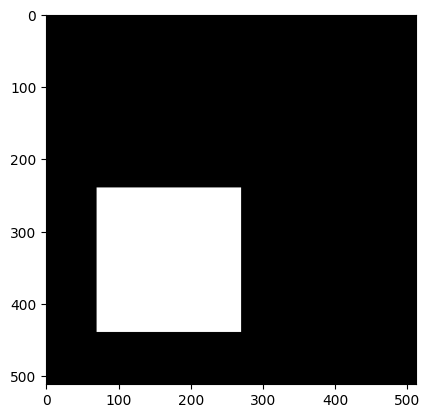

In [86]:
#creating an image
square = np.zeros(apple.shape[:2], np.uint8)
square[240: 440, 70:270] = 255
plt.imshow(square)

In [95]:
sq_points1 = np.float32([[70, 240], [270, 240], [70, 440]])
sq_points2 = np.float32([[112, 240], [312, 240], [70, 440]])
shear_matrix = cv2.getAffineTransform(sq_points1, sq_points2)
shear_matrix

array([[ 1.00000000e+00, -2.10000000e-01,  9.24000000e+01],
       [-1.63161665e-16,  1.00000000e+00,  7.24753590e-14]])

The return value of the shear matrix may look surprising at first. However, when we remember how we wrote the affine transformation matrix above, it should not:
$$\begin{bmatrix}A_{00} & A_{01} & b_0\\A_{10} & A_{11} & b_1\\ 0 & 0 & 1\end{bmatrix}$$
Remember, in order to do this, we had to translate our cartesian coordinates to homogeneous coordinates by adding a 1 for the Z dimension to have $\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}$. When we multiply the two matrices we can see that the bottom row of the matrix does not add much to the resultant coordinates and can be safely ignored. Hence, we can have:
$$\begin{bmatrix}A_{00} & A_{01} & b_0\\A_{10} & A_{11} & b_1\end{bmatrix} * \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}$$
<br>
The result of `getAffineTransform` is exactly this, a 2x3 matrix (Also, note that since we have 6 unknowns, we need 3 points to find the affine matrix - each point gives us two). We also notice that for this specific case $b_0$ which signifies a translation in the X-direction is non-zero. It may come as a surprise, since we were doing a shear and ended up with a translation. It helps to realize that, a shear in 2D is equivalent to a translation in 3D. In 2D, a shear is a translation of rows and columns, whereas in 3D a shear is a translation of the whole plane.
<br><br>
With this knowledge, we can now continue to pass the 2x3 shear matrix to the image and apply it to every coordinate and when we do that, we get a sheared image, as below.

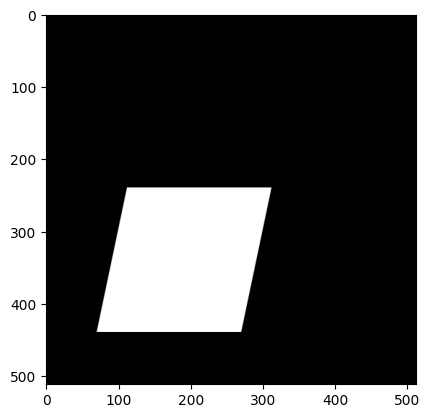

In [91]:
sheared_square = cv2.warpAffine(square, shear_matrix, (512, 512))
plt.imshow(sheared_square)

# What Affine Transforms cannot do

Looking at the properties of affine transformations, we notice that there are things they cannot do.
Affine transformations:
* keep parallel lines parallel
* preserve lines and ratios of lines over each line
* may not preserve lengths (scale) and angles(shear)

The fact that parallel lines remain parallel in an affine transform and that ratios are preserved means that affine transformations cannot correct perspective distortions. An affine transformation can convert an image to a parallelogram, but not to any desired quadilateral as would be the case in perspective transformation.

For example, if we try to shrink the left side of the square while the right side remains the same to show it in perspective, the image appears as below. We cannot do this since parallel lines must remain parallel.

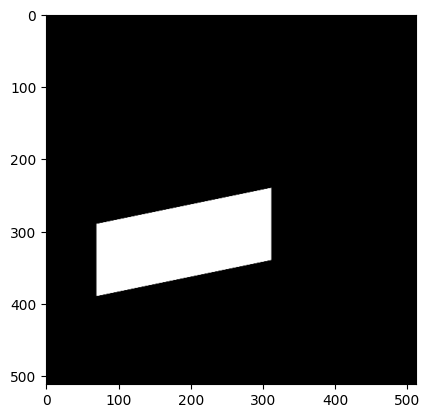

In [96]:
rand_points = np.float32([[70, 290], [312, 240], [70, 390]])
morph_matrix = cv2.getAffineTransform(sq_points1, rand_points)
morphed_square = cv2.warpAffine(square, morph_matrix, (512, 512))
plt.imshow(morphed_square)

This is the result we obtain from this operation. Since parallel lines still remain parallel we cannot show  the square from a different perspective.

Next, we will look at how we can correct and introduce perspectives to 2D images.

## Shear affine transform

We will briefly illustrate how a shear can be implemented. We start with a simple function to shear a coordinate given the coordinate matrix.

In [3]:
def shear_coord(coord, matrix):
    """
    Given a coordinate and a matrix, it returns the sheared coordinate.
    """

    try:
        return np.int32(np.ceil(matrix.dot(coord)))
    except:
        try:
            return np.int32(np.ceil(coord.dot(matrix)))
        except:
            print("Incompatible types!")

We have separated the horizontal and vertical shears.

In [4]:
def shear_horizontal(img, value):
    """
    Shear an image horizontally.
    The value given will be filled into the horizontal shear matrix.
    """
    if value == 0:
        return img

    result = np.zeros_like(img)

    if len(img.shape) == 3:
        # Handle 3-channel img as 3 1-channel ones
        result[:, :, 0] = shear_horizontal(img[:, :, 0], value)
        result[:, :, 1] = shear_horizontal(img[:, :, 1], value)
        result[:, :, 2] = shear_horizontal(img[:, :, 2], value)
        
        return result
    else:
        shear_matrix = np.array([[1, value],[0 , 1]])
        row_choice = 0
        for y in range(img.shape[0] - 1, -1, -1):
            # count backwards to symbolize that
            # origin is at bottom left corner
            left = np.array([0, y], np.int32)
            left_shear = shear_coord(left, shear_matrix)
    
            #splice into result
            if left_shear[0] > 0:
                take = img.shape[1] - left_shear[0]
                if take > 0:
                    result[row_choice, left_shear[0]:] = img[row_choice, :take]
            else:
                take = img.shape[1] + left_shear[0]
                if take > 0:
                    result[row_choice, :take] = img[row_choice, -take:]
            
            row_choice += 1 
        return result

In [5]:
def shear_vertical(img, value):
    """
    Shear an image, vertically.
    The value given will be filled into the vertical shear matrix.
    """
    if value == 0:
        return img
    
    result = np.zeros_like(img)

    if len(img.shape) == 3:
        result[:, :, 0] = shear_vertical(img[:, :, 0], value)
        result[:, :, 1] = shear_vertical(img[:, :, 1], value)
        result[:, :, 2] = shear_vertical(img[:, :, 2], value)
        
        return result
    else:
        shear_matrix = np.array([[1, 0],[value , 1]])
        col_choice = 0
        for x in range(0, img.shape[0]):
            up = np.array([x, img.shape[0]-1], np.int32) 
            up_shear = shear_coord(up, shear_matrix)
            
            #splice into result
            if up_shear[1] > img.shape[0]:
                remove = up_shear[1] - (img.shape[0] - 1)
                take = img.shape[1] - remove
                if take > 0:
                    result[:take, col_choice] = img[remove:, col_choice]
            else:
                remove = img.shape[0] - up_shear[1]
                take = img.shape[1] - remove
                if take > 0:
                    result[remove:, col_choice] = img[:take, col_choice]
            
            col_choice += 1
        return result

The two methods above `shear_horizontal` and `shear_vertical` are not meant to be called directly but are called from within the `shear` function below. 

In [6]:
def shear(img, vertical = 0, horizontal = 0):
    """
    Given an image and the vertical and horizontal shear,
    return the sheared image.
    The vertical and horizontal values can be float & -ve.
    """

    if vertical == 0 and horizontal == 0:
        return img

    res = shear_vertical(shear_horizontal(img, horizontal), vertical)
    return res    

## An Illustration

(-0.5, 511.5, 511.5, -0.5)

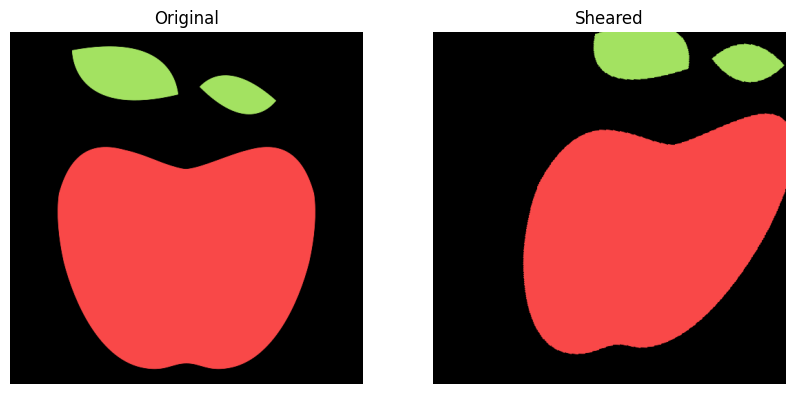

In [80]:
apple = cv2.imread('images/apple.png')
sheared_apple = shear(apple, .1, .3)

plt.figure(figsize=[10, 10])
plt.subplot(121); plt.imshow(apple[:, :, ::-1]); plt.title('Original'); plt.axis('off')
plt.subplot(122); plt.imshow(sheared_apple[:, :, ::-1]); plt.title('Sheared'); plt.axis('off')

More information can be found in the links here: [**1**](https://stackoverflow.com/questions/45637472/opencv-transformationmatrix-affine-vs-perspective-warping), [**2**](https://www.mathworks.com/discovery/affine-transformation.html#:~:text=Affine%20transformation%20is%20a%20linear,with%20non%2Dideal%20camera%20angles.), [**3**](https://www.youtu.be/AheaTd_l5Is), [**4**](https://youtu.be/K2XLXlyPqCA)